In [13]:
#important modules
import sys
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# We use Runge kutta order four for solving the sistem
def RungeKutta4(f, a, L, u, N):
    """
    A function for numerical solution using RK4
    Imputs:
    =======
    f : the right side fucntion of the system of ODE
    a : eta = a in the domain interval [a, L]
    L : eta = L
    u : the initial condition
    N : number of grid points
    Returns:
    ========
    grid points
    numerical solution
    """
    h = (L - a) / N # step size
    result = [] # empty list for storing the numerical solution
    grid = [] # empty list for storing the grid points
    result.append(u)
    grid.append(a)
    x = a
    for i in range(1, N + 1): # implementation of RK4 algorithm
        k1 = f(x, u)
        k2 = f(x + h / 2, u + h * k1 / 2)
        k3 = f(x + h / 2, u + h * k2 / 2)
        k4 = f(x + h, u + h * k3)
        u = u + h * (k1 + 2 * k2 + 2 * k3 + k4)/6
        x = x + h
        result.append(u)
        grid.append(x)
    return np.array(grid), np.array(result)

In [15]:
# initial condition with the shooting parameter s,
def u0(s):
    return np.array([0, 0, s])

In [16]:
# F(s) = u_2(s, L) - 1
def F(s, L):
    u = u0(s)
    grid, result = RungeKutta4(f, a, L, u, N)
    #y = result[len(result)-2] #?
    F = (result[len(result)-2])[1] - b
    return F

In [17]:
#formulate as a first-order system and define the right side function for the nonlinear ode
def f(t, u):
    f = np.zeros(3)
    f[0] = u[1]
    f[1] = u[2]
    f[2] = -0.5 * u[0] * u[2]
    return f

In [18]:
# the secant method for solving the algebric equation F(s) = 0
def Secant(F, s0, s1, eps, L):
    global s
    F0 = F(s0, L)
    F1 = F(s1, L)
    iteration_counter = 0
    while abs(F1) > eps and iteration_counter < 100:
        try:
            denominator = (F1 - F0) / (s1 - s0)
            s = s1 - F1 / denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for s =', s1)
            sys.exit(1) # Abort with error
        s0 = s1
        s1 = s
        F0 = F1
        F1 = F(s1, L)
        iteration_counter = iteration_counter + 1
# here, either a solution is found or too many iterations
    if abs(F(s,L)) > eps:
        iteration_counter = -1
    return s, iteration_counter

In [19]:
# Parameters
a = 0
b = 1
L = 6
N = 1000
# initializing the parameter s, and set the tollerance eps
s0 = 1.0
s1 = 2.0
eps = 1.0e-6
s, no_iterations = Secant(F, s0, s1, eps, L)
print('s =', s)
print('number of iteration = ', no_iterations)

s = 0.33257308624087173
number of iteration =  6


In [20]:
# Now we use the approperaite shooting parameter in the initial condition and solve for the system of ODE
u = u0(s)
grid, result = RungeKutta4(f, a, L, u, N)

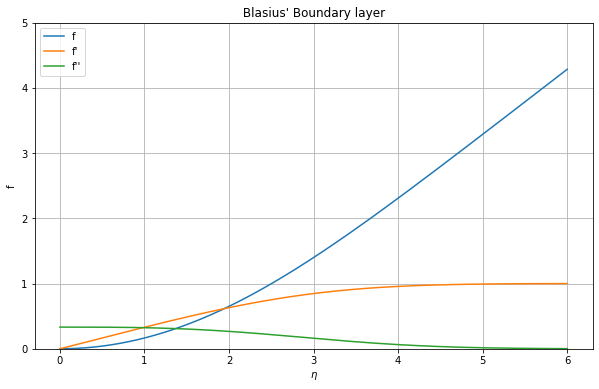

In [21]:
# Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(grid, result[:, 0], grid, result[:, 1], grid, result[:, 2])
plt.xlabel('$\eta$')
plt.ylabel("f")
plt.ylim([0,5])
plt.grid(True)
plt.title(" Blasius' Boundary layer ")
plt.legend(['f', "f'", "f''"])
plt.savefig('Shooting.png')
plt.show()
